# import

In [1]:
import os
import random
from glob import glob

import numpy as np
import pandas as pd

from PIL import Image
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import tensorflow as tf

%matplotlib inline

# load data

In [2]:
path = './data/train/'
images = []
labels = []
for filename in glob(path + '*'): # 폴더(라벨) 경로
    for img in glob(filename + '/*.jpg'): # 개별 이미지 경로
        img_open = Image.open(img) # 이미지 로드
        img_arr = np.array(img_open) # 배열화
        images.append(img_arr)
        
        label = filename.split('\\')[1] # 라벨 추출
        labels.append(label)

train_images = np.array(images)
train_labels = np.array(labels)

le = LabelEncoder()
train_labels = le.fit_transform(train_labels)
train_labels = train_labels.reshape(-1, 1)

train_images.shape, train_labels.shape

((50000, 32, 32, 3), (50000, 1))

In [3]:
path = './data/test/'
images = []
test_idx = []
flist = sorted(glob(path + '*.jpg'))
for filename in flist:
    img_open = Image.open(img) # 이미지 로드
    img_arr = np.array(img_open) # 배열화
    images.append(img_arr)
    
    label = filename.split('\\')[1] # 라벨 추출
    test_idx.append(label)

test_images = np.array(images)

test_images.shape, test_idx[:5]

((10000, 32, 32, 3),
 ['0000.jpg', '0001.jpg', '0002.jpg', '0003.jpg', '0004.jpg'])

# EDA

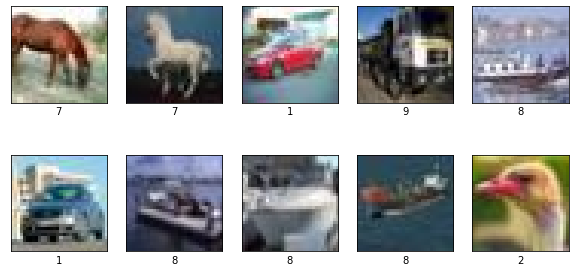

In [4]:
plt.figure(figsize=(10, 5))
for i in range(10):
    num = random.randint(0, train_images.shape[0])
    
    plt.subplot(2, 5, i + 1)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.xlabel(train_labels[num][0])
    plt.imshow(train_images[num])
plt.show()

c:\workspace\mlProject\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


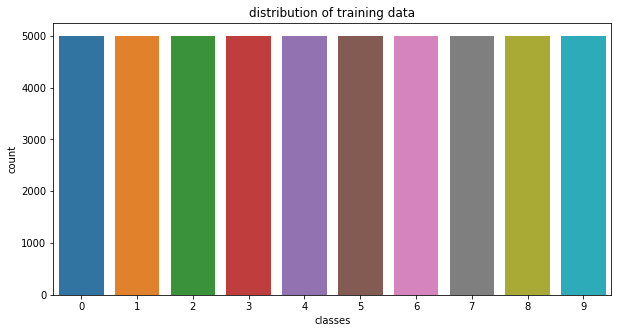

In [6]:
plt.figure(figsize=(10, 5))
sns.countplot(train_labels.ravel()) # 다차원을 1차원으로 변환
plt.title('distribution of training data')
plt.xlabel('classes')
plt.show()

# preprocessing

In [7]:
X_train, X_val, y_train, y_val = train_test_split(train_images, train_labels, test_size=0.2, random_state=0)

X_test = test_images

X_train.shape, X_val.shape, X_test.shape

((40000, 32, 32, 3), (10000, 32, 32, 3), (10000, 32, 32, 3))

In [8]:
# normalization
X_train = X_train / 255
X_val = X_val / 255
X_test = X_test / 255

In [10]:
X_train.shape[1:]

(32, 32, 3)

# modeling

In [14]:
model = tf.keras.models.Sequential(
    [
        tf.keras.layers.Conv2D(16, (3, 3), activation='relu', padding='SAME', input_shape=X_train.shape[1:]), # conv layer. extract feature map
        tf.keras.layers.MaxPooling2D(2, 2, padding='SAME'), # pooling layer. 데이터의 공간적 크기 축소하면서 대푯값으로 이미지 전체의 특징 보존. 학습시간을 단축하고 오버피팅 문제 완화
        tf.keras.layers.Dropout(0.23),
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='SAME'),
        tf.keras.layers.MaxPooling2D(2, 2, padding='SAME'),
        tf.keras.layers.Dropout(0.23),
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='SAME'),
        tf.keras.layers.MaxPooling2D(2, 2, padding='SAME'),
        tf.keras.layers.Dropout(0.23),
        tf.keras.layers.Flatten(), # n차원을 1차원으로 변환
        tf.keras.layers.Dense(1024, activation='relu'), # fully connected layer
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(10, activation='softmax') # output layer
    ]
)

model.compile(
    optimizer='adam', 
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
)

In [15]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 32, 32, 16)        448       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 16, 16, 16)       0         
 2D)                                                             
                                                                 
 dropout_8 (Dropout)         (None, 16, 16, 16)        0         
                                                                 
 conv2d_7 (Conv2D)           (None, 16, 16, 32)        4640      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 8, 8, 32)         0         
 2D)                                                             
                                                                 
 dropout_9 (Dropout)         (None, 8, 8, 32)         

# train

In [16]:
model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=10, batch_size=128
)

Epoch 1/10
313/313 [==============================] - 144s 438ms/step - loss: 1.8278 - accuracy: 0.3334 - val_loss: 1.5039 - val_accuracy: 0.4679
Epoch 2/10
313/313 [==============================] - 95s 304ms/step - loss: 1.4720 - accuracy: 0.4663 - val_loss: 1.3127 - val_accuracy: 0.5350
Epoch 3/10
313/313 [==============================] - 115s 367ms/step - loss: 1.3441 - accuracy: 0.5146 - val_loss: 1.2087 - val_accuracy: 0.5847
Epoch 4/10
313/313 [==============================] - 87s 276ms/step - loss: 1.2736 - accuracy: 0.5455 - val_loss: 1.1785 - val_accuracy: 0.5830
Epoch 5/10
313/313 [==============================] - 91s 291ms/step - loss: 1.2137 - accuracy: 0.5644 - val_loss: 1.1230 - val_accuracy: 0.5991
Epoch 6/10
313/313 [==============================] - 87s 276ms/step - loss: 1.1649 - accuracy: 0.5846 - val_loss: 1.0670 - val_accuracy: 0.6287
Epoch 7/10
313/313 [==============================] - 79s 253ms/step - loss: 1.1326 - accuracy: 0.5932 - val_loss: 1.0252 - val_

In [17]:
pred_proba = model.predict(X_test)
pred_class = [np.argmax(i) for i in pred_proba]

pred_class = le.inverse_transform(pred_class)
pred_class[:5]

array(['truck', 'truck', 'truck', 'truck', 'truck'], dtype='<U10')

# submit

In [18]:
sub = pd.read_csv('./data/sample_submission.csv')
sub

,id,target
0,0000.jpg,human
1,0001.jpg,human
2,0002.jpg,human
3,0003.jpg,human
4,0004.jpg,human
...,...,...
9995,9995.jpg,human
9996,9996.jpg,human
9997,9997.jpg,human
9998,9998.jpg,human


In [19]:
sub['target'] = pred_class
sub

,id,target
0,0000.jpg,truck
1,0001.jpg,truck
2,0002.jpg,truck
3,0003.jpg,truck
4,0004.jpg,truck
...,...,...
9995,9995.jpg,truck
9996,9996.jpg,truck
9997,9997.jpg,truck
9998,9998.jpg,truck


In [ ]:
sub.to_csv('./baseline.csv', index=False)